<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249S22/)</center>


1. Make sure you fill in all cells contain `YOUR CODE HERE` or `YOUR ANSWER HERE`.
2. After you finished, `Restart the kernel & run` all cell in order.
---------


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csc249

# Understand filters

As mentioned in warmup, filters utilize one of the core ideas of computer vision: seen image as a tensor.
Moreover, the design of the filter is more subtle because it can discretize the continuous function where you can have all good properties from signal processing(high-pass, low-pass) to handle different types of noises.

## Gaussian kernel

Implement the Gaussian kernel in pixel domain, which is defined as:

$$k(x,y)=\frac{1}{2\pi\sigma^2} \cdot e^\frac{x^2+~y^2}{-2\sigma^2}$$


In [2]:
def gaussian_kernel(shape=(5,5),sigma=5):
    """
    Arguments:
    ----------
        shape : tuple
            size of the filter.
            A 3D numpy.ndarray of shape (h,w).
        sigma : real number
            shapeness of the filter.
    Returns:
    --------
        Gaussian filter with specified shape.
    """
    gaussian_filter = np.zeros(shape)
    s = 2*sigma*sigma
    a = np.linspace(-(shape[0]-1)//2,(shape[0]-1)//2,num=shape[0])
    b = np.linspace(-(shape[1]-1)//2,(shape[1]-1)//2,num=shape[1])
    for x in range(shape[0]):
        for y in range(shape[1]):
            r = np.sqrt(a[x]*a[x]+b[y]*b[y])
            gaussian_filter[x][y] = np.exp(r*r/(-s))/(s*np.pi)
    
    return gaussian_filter
    
#     raise NotImplementedError()

In [3]:
kernel = gaussian_kernel(shape=(5, 5),sigma=5)

In [4]:
kernel = gaussian_kernel(shape=(5, 5),sigma=1)

## Kernel surface

#### a. Use `plot_3D` to plot 3d shape of the kernel.
Parameter:
- kernel: generated by the `gaussian_kernel` function with `shape=(15,15), sigma=5`
- X: the x-axis linespace with `kernel.shape[1]` samples, keep 0 at the center. e.g. `[-1,0,1]` for `3x3` kernel
- Y: the y-axis linespace with `kernel.shape[0]` samples, keep 0 at the center. e.g. `[-1,0,1]` for `3x3` kernel

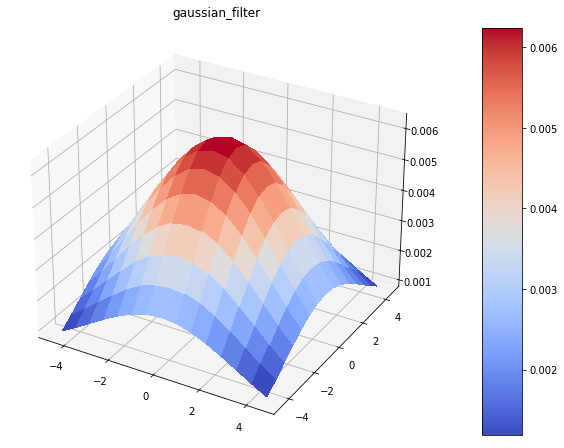

In [5]:

X=np.linspace(-4.5, 4.5, num=15)
Y=np.linspace(-4.5, 4.5, num=15)
kernel = gaussian_kernel(shape=(15, 15),sigma=5)
# print(kernal.shape[0])

csc249.plot_3D(kernel,X,Y, 'gaussian_filter')

## Different parameters
Plot gaussian with with different parameters and describle the relation between sigma and the kernel shape .  
Sigma sample = `2,5,10`, kernel shape = `10, 20` so you will need to plot six figures.

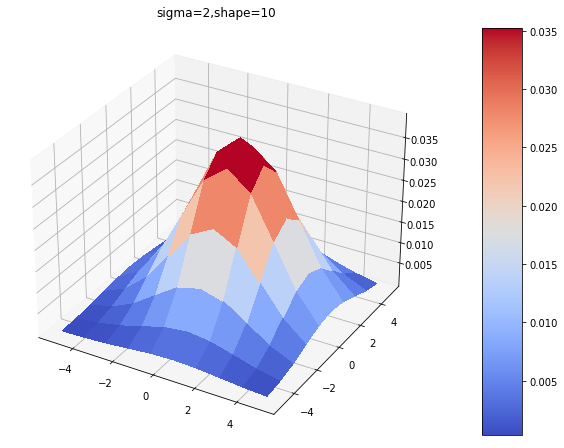

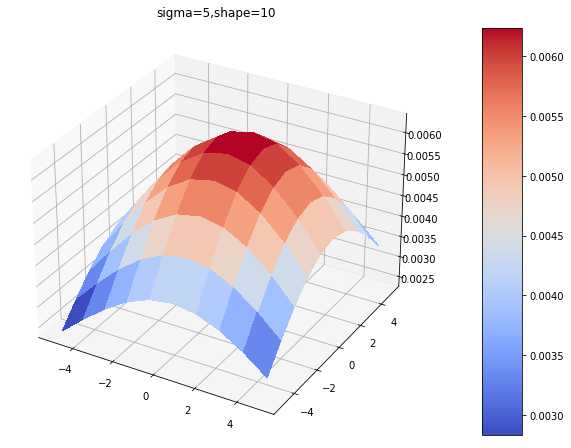

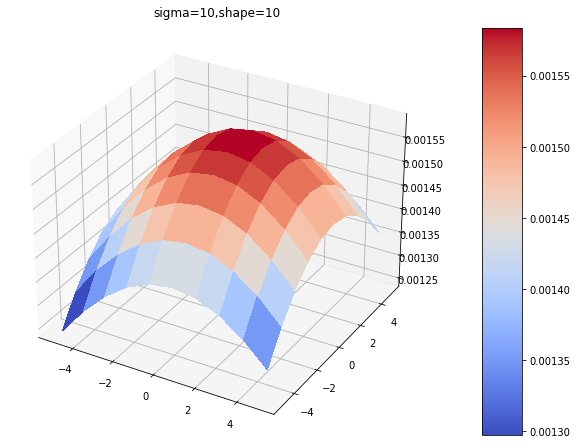

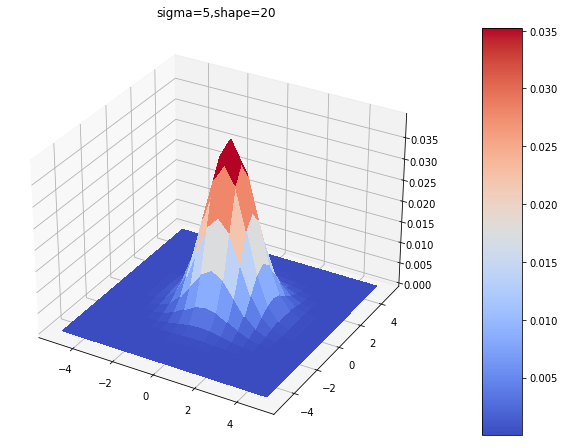

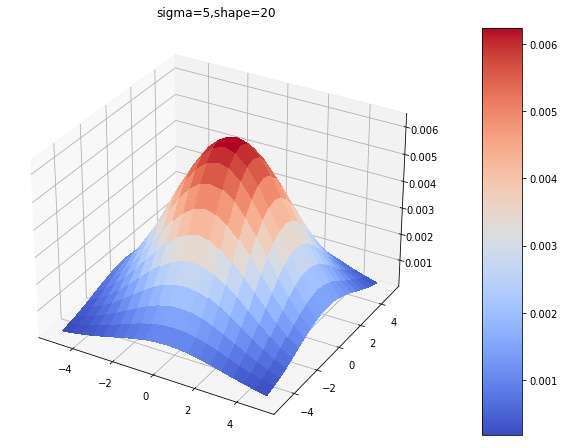

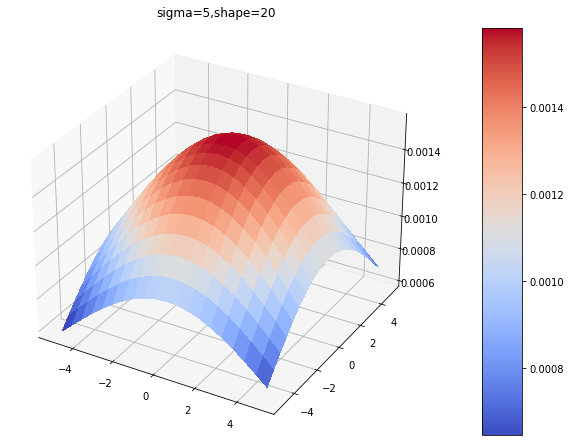

In [6]:
X=np.linspace(-5, 5, num=10)
Y=np.linspace(-5, 5, num=10)
kernel = gaussian_kernel(shape=(10, 10),sigma=2)
img1 = csc249.plot_3D(kernel,X,Y, 'sigma=2,shape=10')
plt.show(img1)

X=np.linspace(-5, 5, num=10)
Y=np.linspace(-5, 5, num=10)
kernel = gaussian_kernel(shape=(10, 10),sigma=5)
img2 = csc249.plot_3D(kernel,X,Y, 'sigma=5,shape=10')
plt.show(img2)

X=np.linspace(-5, 5, num=10)
Y=np.linspace(-5, 5, num=10)
kernel = gaussian_kernel(shape=(10, 10),sigma=10)
img3 = csc249.plot_3D(kernel,X,Y, 'sigma=10,shape=10')
plt.show(img3)

X=np.linspace(-5, 5, num=20)
Y=np.linspace(-5, 5, num=20)
kernel = gaussian_kernel(shape=(20, 20),sigma=2)
img4 = csc249.plot_3D(kernel,X,Y, 'sigma=5,shape=20')
plt.show(img4)

X=np.linspace(-5, 5, num=20)
Y=np.linspace(-5, 5, num=20)
kernel = gaussian_kernel(shape=(20, 20),sigma=5)
img5 = csc249.plot_3D(kernel,X,Y, 'sigma=5,shape=20')
plt.show(img5)

X=np.linspace(-5, 5, num=20)
Y=np.linspace(-5, 5, num=20)
kernel = gaussian_kernel(shape=(20, 20),sigma=10)
img6 = csc249.plot_3D(kernel,X,Y, 'sigma=5,shape=20')
plt.show(img6)

## Smooth methods
Compare different noise and smoothing methods

In [7]:
image = cv2.imread(str(csc249.data/'lena.tiff'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255.0

In [8]:
# import random
# import itertools
# generate two image with `gaussian` and `pepper-and-salt` repectively.
# - use `np.random.normal()` to generate gaussian noise
# - use ` np.clip()` to limit the pixel value 
def gassian_noise(img,mean=0,sigma=0.3):
    # 
     return np.clip(img+np.random.normal(mean,sigma,img.shape),0,1)
def salt_pepper_noise(img,amount,ratio):
    # ratio: # of salt/# of pepper
    # amount: noise amount, 0.01 = 1% of total pixels will become noise
    # 
    numAmount = int(img.shape[0]*img.shape[1]*amount)
    numPepper = int(numAmount//(1+ratio))
    numSalt = numAmount - numPepper
    for i in range(numPepper):
        x = np.random.randint(img.shape[0])
        y = np.random.randint(img.shape[1])
        img[x][y] = 0
    for j in range(numSalt):
        x = np.random.randint(img.shape[0])
        y = np.random.randint(img.shape[1])
        img[x][y] = 1
    return img

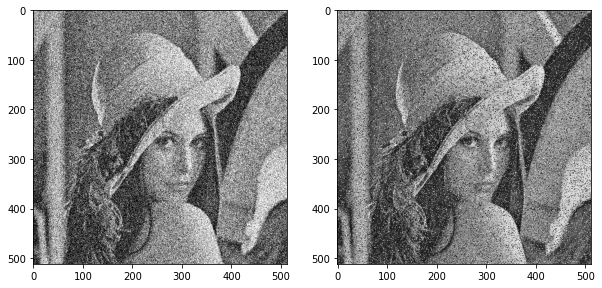

In [9]:
fig, axs = plt.subplots(1,2,figsize=(10,20))
gassian_noise_img=gassian_noise(image,0,0.25)
salt_pepper_noise_img=salt_pepper_noise(image,0.2,0.5)
axs[0].imshow(gassian_noise_img,cmap='gray')
axs[1].imshow(salt_pepper_noise_img,cmap='gray')

In [10]:
# b. implement `median` filter and apply `gaussian` filter and `median` filter 
def median_filter(img,size=3):
    # return the filtered image
    # 
    indexer = size//2
    new_img = np.zeros((img.shape[0]-indexer*2,img.shape[1]-indexer*2))
    for x in range(indexer,new_img.shape[0]-indexer):
        for y in range(indexer,new_img.shape[1]-indexer):
            new_img[x-indexer][y-indexer] = np.median(img[x-1:x+2,y-1:y+2])
    return new_img


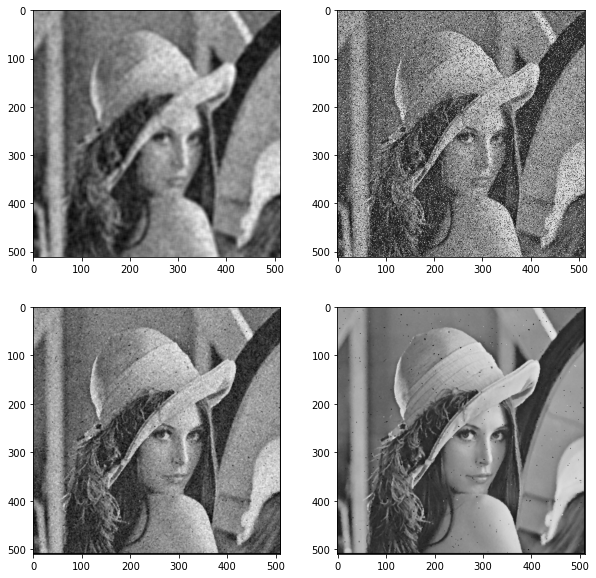

In [11]:
gassian_noise_img=gassian_noise(image,0,0.1)
salt_pepper_noise_img=salt_pepper_noise(image,0.01,0.7)
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].imshow(cv2.filter2D(gassian_noise_img,-1,gaussian_kernel((10,10),5)),cmap='gray')
axs[0,1].imshow(cv2.filter2D(salt_pepper_noise_img,-1,gaussian_kernel((3,3),0.25)),cmap='gray')
axs[1,0].imshow(median_filter(gassian_noise_img),cmap='gray')
axs[1,1].imshow(median_filter(salt_pepper_noise_img),cmap='gray')

# Submission

1. At the menubar, click `Kernel`$\rightarrow$ `Restart & Run All`
2. Download the zip file and upload via blackboard
   
1% deduction of late assignment total score per hour passing the deadline.

In [12]:
# import csc249
# csc249.make_submission()